In [3]:
! pip install pandas

In [4]:
! pip install tensorflow-gpu

In [5]:
!pip install keras

In [7]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.0
Hub version: 0.9.0
GPU is available


In [8]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
#from keras.applications.inception_v3 import InceptionV3
#from keras.applications.inception_v3 import preprocess_input, decode_predictions

In [9]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve,auc,accuracy_score
import os
import cv2

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
X = []
y = []
IMG_SIZE = 224
DIR = "/content/drive/My Drive/Colab Notebooks/Flowers/"
folders1 = os.listdir(DIR)
folders1

['sunflower', 'daisy', 'rose', 'tulip', 'dandelion']

In [12]:
for i, file in enumerate(folders):
    filename = os.path.join(DIR, file)
    print("Folder {} started".format(file))
    try:
        for img in os.listdir(filename):
            path = os.path.join(filename, img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            y.append(i)
    except:
        print("File {} not read".format(path))
        
    print("Folder {} done".format(file))
    print("The folder {} is labeled as {}".format(file, i))

Folder sunflower started
Folder sunflower done
The folder sunflower is labeled as 0
Folder daisy started
Folder daisy done
The folder daisy is labeled as 1
Folder rose started
Folder rose done
The folder rose is labeled as 2
Folder tulip started
Folder tulip done
The folder tulip is labeled as 3
Folder dandelion started
Folder dandelion done
The folder dandelion is labeled as 4


In [13]:
X = np.array(X)
y = np.array(y)

print("X shape is {}".format(X.shape))
print("y shape is {}".format(y.shape))

X shape is (4323, 224, 224, 3)
y shape is (4323,)


In [14]:
from tensorflow.keras.utils import to_categorical

print("Before the categorical the shape of y is {}".format(y.shape))
y = to_categorical(y)
print("After the categorical the shape of y is {}".format(y.shape))

Before the categorical the shape of y is (4323,)
After the categorical the shape of y is (4323, 5)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print("There are {} training examples".format(X_train.shape[0]))
print("There are {} test examples".format(X_test.shape[0]))

There are 3458 training examples
There are 865 test examples


In [16]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(
      rescale = 1./255)


In [17]:
training_set=training_datagen.flow(X_train,y_train)
test_set=validation_datagen.flow(X_test,y_test)

In [18]:
#CNN

In [ ]:
model1 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [20]:
# Import the VGG19 library as shown below and add preprocessing layer to the front of VGG19",
# Here we will be using imagenet weights\n"
IMAGE_SIZE=[224,224]
vgg= VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [21]:
# don't train existing weights\n",
for layer in vgg.layers:
    layer.trainable = False

In [22]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Colab Notebooks/Flowers/*')
len(folders)

5

In [23]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [24]:
prediction=Dense(len(folders), activation='softmax')(x)

In [26]:
model = Model(inputs=vgg.input, outputs=prediction)

In [27]:
# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [28]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [29]:
batch_size=32
r= model.fit_generator(training_set,epochs = 25, validation_data = test_set,verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
108/108 [==============================] - 45s 418ms/step - loss: 0.9844 - accuracy: 0.6457 - val_loss: 0.6139 - val_accuracy: 0.7688
Epoch 2/25
108/108 [==============================] - 45s 416ms/step - loss: 0.7312 - accuracy: 0.7431 - val_loss: 0.6692 - val_accuracy: 0.7711
Epoch 3/25
108/108 [==============================] - 46s 430ms/step - loss: 0.6457 - accuracy: 0.7656 - val_loss: 0.6977 - val_accuracy: 0.7526
Epoch 4/25
108/108 [==============================] - 45s 420ms/step - loss: 0.6278 - accuracy: 0.7752 - val_loss: 0.4855 - val_accuracy: 0.8301
Epoch 5/25
108/108 [==============================] - 45s 415ms/step - loss: 0.5857 - accuracy: 0.7968 - val_loss: 0.5585 - val_accuracy: 0.8046
Epoch 6/25
108/108 [==============================] - 45s 416ms/step - loss: 0.5200 - accuracy: 0.8155 - val_loss: 0.5378 - val_accuracy: 0.8231
Epoch 7/25
108/108 [==============================] - 

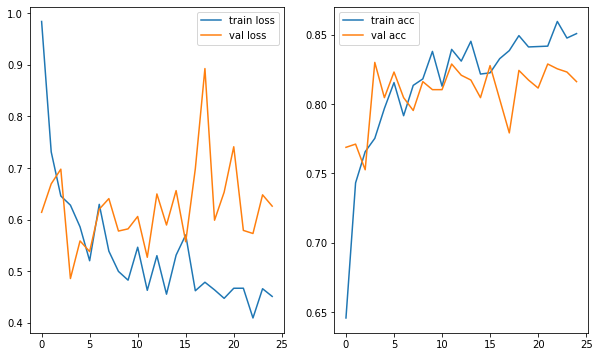

In [30]:
# plot the loss
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.subplot(1,2,2)
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('AccVal_acc')

In [31]:
k=r.history['val_accuracy']
np.array(k[-1])

array(0.816185)

In [32]:
# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('Flowers1_model_vgg19.h5')

In [45]:
predictions = model.predict(X_test)
prediction_digits = np.argmax(predictions, axis=1)

labels_pred = np.unique(prediction_digits, return_counts=True)
labels_pred

(array([0, 1, 2, 3, 4]), array([223, 245,  44, 220, 133]))

In [43]:
real_labels= np.argmax(y_test, axis=1)
real_labels
real_labels1 = np.unique(real_labels, return_counts=True)
real_labels1

(array([0, 1, 2, 3, 4]), array([141, 177, 154, 202, 191]))

In [44]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(real_labels, prediction_digits)
c_m

array([[123,  12,   0,   4,   2],
       [ 11, 154,   0,   4,   8],
       [ 31,  27,  40,  55,   1],
       [ 28,  15,   3, 154,   2],
       [ 30,  37,   1,   3, 120]])

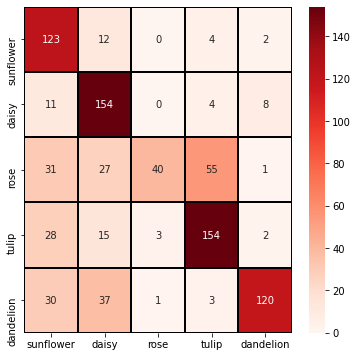

In [67]:
import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(c_m,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = folders1 , yticklabels = folders1)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [46]:
model=load_model('Flowers1_model_vgg19.h5')

In [47]:
img=image.load_img('/content/drive/My Drive/flower-tulip-vector-21117948.jpg',target_size=(224,224))


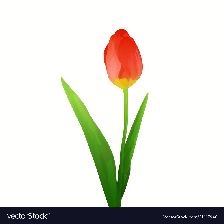

In [48]:
img

In [57]:
y=image.img_to_array(img)
y=np.expand_dims(y,axis=0)
imgy=preprocess_input(y)
imgy=imgy/255

In [58]:
preds= model.predict(imgy)
preds



array([[3.3126490e-03, 6.7297015e-03, 9.3831941e-03, 9.8037452e-01,
        1.9985356e-04]], dtype=float32)

In [59]:
a=np.argmax(preds, axis=1)
a

array([3])

In [60]:
if(a==0):
    print("Sunflower")
elif(a==1):
    print("Daisy")
elif(a==2):
    print("Rose")
elif(a==3):
    print("Tulip")
else:
    print("Dandelion")

Tulip
